In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 0. Data Loading

Load the pre-cleaned dataset and perform minimal cleaning (remove duplicates and missing values).

# 🚗 Used Car Price Prediction - Ridge Regression Model

**Objective:** Build a baseline linear regression model using Ridge to predict used car prices

**Project Pipeline:**
1. **Data Loading** - Load pre-cleaned dataset
2. **Feature Engineering** - Create Car_Age, encode Make & State
3. **Model Training** - Ridge Regression with 4 key features
4. **Production Model** - Fast, simple baseline (used in app.py)

**Key Metrics:** R² Score, MAE (Mean Absolute Error), RMSE

**Why Ridge Regression?**
- Fastest training time among all models
- Simple linear baseline for comparison
- L2 regularization prevents coefficient explosion
- Good for understanding linear relationships
- Useful benchmark before complex models

In [2]:
# Load Pre-cleaned Data
df = pd.read_csv("true_car_listings.csv")
print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")

# Quick data cleaning (minimal)
df_clean = df.drop_duplicates().dropna().reset_index(drop=True)
print(f"Clean dataset: {df_clean.shape[0]:,} rows")

Dataset loaded: 852,092 rows, 8 columns
Clean dataset: 852,092 rows
Clean dataset: 852,092 rows


## 1. Feature Engineering

**Created Features:**

1. **Car_Age** = 2025 - Year  
   More intuitive than raw year. Older cars depreciate more.

2. **Make_Encoded** (LabelEncoder)  
   Converts brand names to numbers (Ferrari=13, Ford=49)  
   Captures brand premium in pricing

3. **State_Encoded** (LabelEncoder)  
   Converts states to numbers to capture regional price variations

**Final Features:** Car_Age, Mileage, Make_Encoded, State_Encoded (4 features)

In [3]:
# Feature Engineering
print("=== FEATURE ENGINEERING ===\n")

# Create Car_Age feature
df_clean['Car_Age'] = 2025 - df_clean['Year']
print(f"✓ Created Car_Age feature (Range: {df_clean['Car_Age'].min()}-{df_clean['Car_Age'].max()} years)")

# Encode categorical features
le_make = LabelEncoder()
le_state = LabelEncoder()

df_clean['Make_Encoded'] = le_make.fit_transform(df_clean['Make'])
df_clean['State_Encoded'] = le_state.fit_transform(df_clean['State'])

print(f"✓ Encoded {df_clean['Make'].nunique()} car makes (brands)")
print(f"✓ Encoded {df_clean['State'].nunique()} US states")

print(f"\n✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)")
print(f"✓ Dataset ready: {df_clean.shape[0]:,} rows")

=== FEATURE ENGINEERING ===

✓ Created Car_Age feature (Range: 7-28 years)
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states

✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)
✓ Dataset ready: 852,092 rows
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states

✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)
✓ Dataset ready: 852,092 rows


## 2. Model Training - Ridge Regression

**Configuration (aligned with production model.py):**
- **Features:** Car_Age, Mileage, Make_Encoded, State_Encoded
- **Algorithm:** Ridge Regression (Linear with L2 regularization)
- **Alpha:** 1.0 (regularization strength)
- **Split:** 80% training, 20% testing

**Why Ridge Regression?**
- **Speed:** Fastest training among all models
- **Simplicity:** Linear model, easy to interpret
- **Baseline:** Good reference point for complex models
- **Regularization:** L2 penalty prevents overfitting
- **Efficiency:** Minimal computational resources

In [4]:
print("="*80)
print("TRAINING RIDGE REGRESSION MODEL")
print("="*80)

# Use same features as production (model.py)
features = ['Car_Age', 'Mileage', 'Make_Encoded', 'State_Encoded']
X = df_clean[features]
y = df_clean['Price']

print(f"\nFeatures: {', '.join(features)}")

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]:,} | Testing samples: {X_test.shape[0]:,}")

# Train Ridge Regression (aligned with model.py)
print("\nTraining Ridge Regression...")
model = Ridge(alpha=1.0)  # Same as model.py
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n📊 PERFORMANCE METRICS")
print(f"   R² Train:  {r2_train:.4f}")
print(f"   R² Test:   {r2_test:.4f}")
print(f"   MAE:       ${mae_test:,.2f}")
print(f"   RMSE:      ${rmse_test:,.2f}")
print(f"   Gap:       {r2_train - r2_test:.4f}")
print("="*80)

TRAINING RIDGE REGRESSION MODEL

Features: Car_Age, Mileage, Make_Encoded, State_Encoded
Training samples: 681,673 | Testing samples: 170,419

Training Ridge Regression...

📊 PERFORMANCE METRICS
   R² Train:  0.1987
   R² Test:   0.2026
   MAE:       $7,722.32
   RMSE:      $12,085.74
   Gap:       -0.0038

📊 PERFORMANCE METRICS
   R² Train:  0.1987
   R² Test:   0.2026
   MAE:       $7,722.32
   RMSE:      $12,085.74
   Gap:       -0.0038


## 3. Feature Coefficients Analysis

**Understanding Linear Model:**

Ridge Regression provides coefficients showing how each feature affects price:

- **Positive coefficient:** Feature increases price
- **Negative coefficient:** Feature decreases price
- **Magnitude:** Larger absolute value = stronger impact

**Note:** Linear models assume linear relationships, which may not capture complex patterns in real data.

=== FEATURE COEFFICIENTS ===

      Feature  Coefficient
      Car_Age  -767.921563
 Make_Encoded   -64.712897
State_Encoded    24.257362
      Mileage    -0.089258


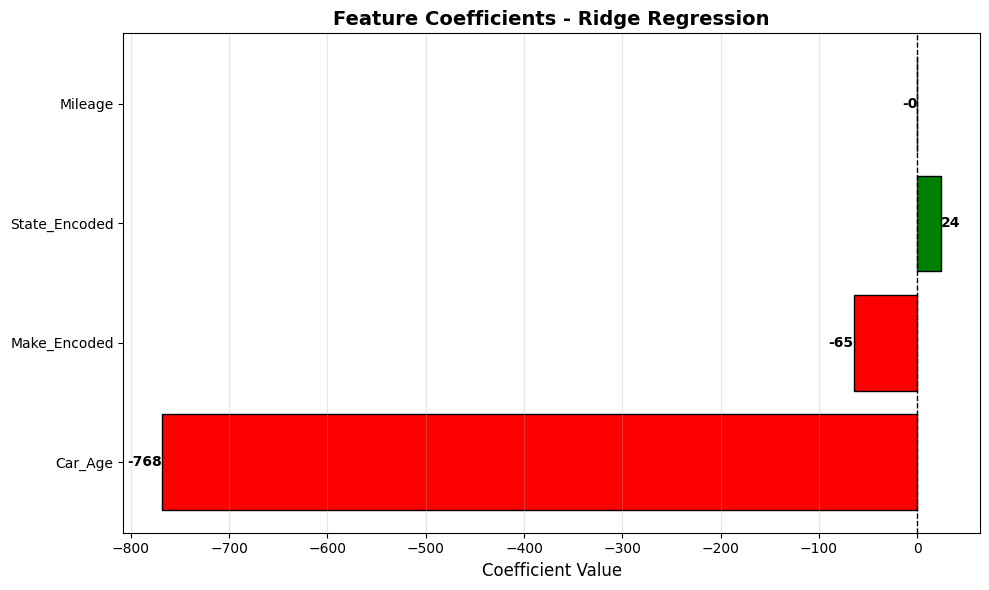

In [5]:
# Feature Coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("=== FEATURE COEFFICIENTS ===\n")
print(coef_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Coefficients - Ridge Regression', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

for i, (feat, coef) in enumerate(zip(coef_df['Feature'], coef_df['Coefficient'])):
    plt.text(coef, i, f'{coef:.0f}', va='center', fontsize=10, fontweight='bold',
             ha='left' if coef > 0 else 'right')

plt.tight_layout()
plt.show()

## 4. Model Evaluation & Visualization

**Performance Metrics:**
- **R² Score:** How well the model explains price variance (0-1, higher is better)
- **MAE:** Average prediction error in dollars (lower is better)
- **RMSE:** Penalizes large errors more heavily (lower is better)

**Visualizations:**
1. **Actual vs Predicted:** Shows prediction accuracy
2. **Residual Plot:** Reveals systematic errors (should be random)
3. **Feature Coefficients:** Shows linear relationships
4. **Error Distribution:** Shows prediction error patterns

**Expected Performance:** Ridge typically has lower R² than tree-based models but trains much faster.

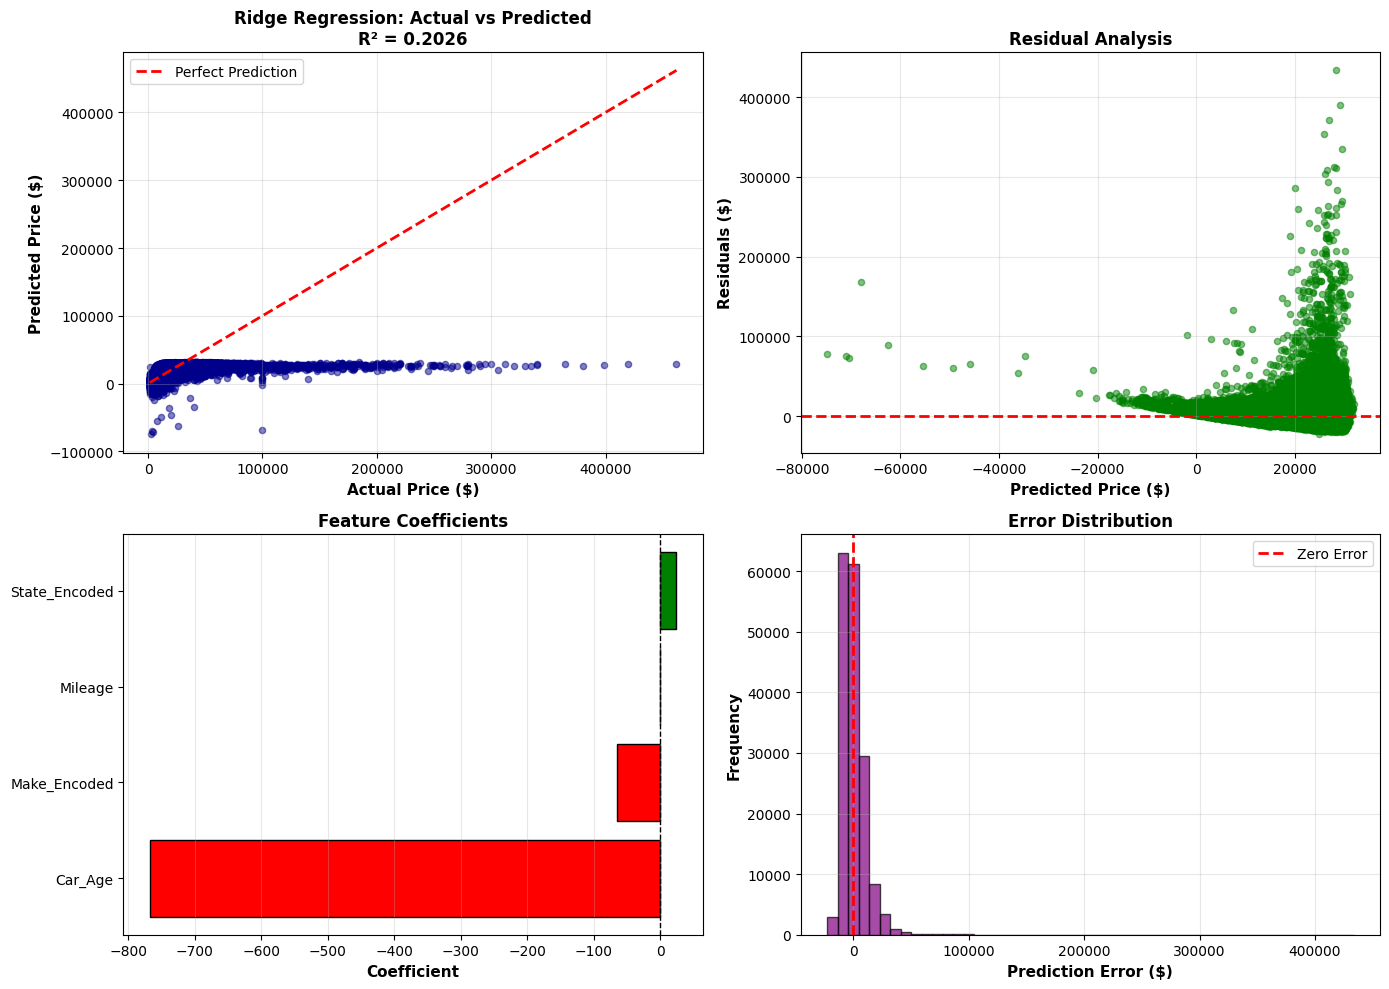


✅ GOOD FIT: Gap = -0.0038
Model explains 20.3% of price variance on test data

💡 Ridge Regression Characteristics:
   • Fastest training time (baseline model)
   • Linear relationships only
   • Simple and interpretable
   • Good for feature importance analysis
   • Available in production (app.py) for comparison


In [6]:
# Comprehensive Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='darkblue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_title(f'Ridge Regression: Actual vs Predicted\nR² = {r2_test:.4f}', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residual Analysis
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=20, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Residuals ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Residual Analysis', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Coefficients
coef_sorted = coef_df.sort_values('Coefficient', ascending=True)
colors = ['green' if x > 0 else 'red' for x in coef_sorted['Coefficient']]
axes[1, 0].barh(coef_sorted['Feature'], coef_sorted['Coefficient'], 
                color=colors, edgecolor='black')
axes[1, 0].set_xlabel('Coefficient', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Feature Coefficients', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Error Distribution
axes[1, 1].hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 1].set_xlabel('Prediction Error ($)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Error Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model assessment
r2_diff = r2_train - r2_test
if r2_diff < 0.05:
    status = "✅ GOOD FIT"
elif r2_diff < 0.10:
    status = "⚠️ SLIGHT OVERFITTING"
else:
    status = "❌ OVERFITTING"

print(f"\n{status}: Gap = {r2_diff:.4f}")
print(f"Model explains {r2_test*100:.1f}% of price variance on test data")
print(f"\n💡 Ridge Regression Characteristics:")
print(f"   • Fastest training time (baseline model)")
print(f"   • Linear relationships only")
print(f"   • Simple and interpretable")
print(f"   • Good for feature importance analysis")
print(f"   • Available in production (app.py) for comparison")

## 5. Summary & Production Deployment

**Model Performance:**
- Uses 4 engineered features (Car_Age, Mileage, Make_Encoded, State_Encoded)
- Provides fast predictions with minimal computational cost
- Serves as baseline for comparing complex models

**Why Ridge Regression in Production:**

✅ **Speed:** Instant training and prediction  
✅ **Simplicity:** Easy to understand and debug  
✅ **Baseline:** Reference point for model comparison  
✅ **Efficiency:** Minimal memory and CPU usage  
✅ **Deployment:** Available in Flask app (app.py) for comparison

**Production Configuration (model.py):**
```python
Ridge(alpha=1.0)
```

**Limitations:**
- Assumes linear relationships (may miss non-linear patterns)
- Lower accuracy than ensemble methods
- Cannot capture complex feature interactions

**Next Steps:**
- Use as baseline comparison against Decision Tree, Random Forest, and HistGradientBoosting
- Model is deployed in Flask API via `/api/predict` endpoint
- Users can select this model in the web interface for fast predictions